# Regional cloud cover

In [11]:
# -*- coding: utf-8 -*-
%matplotlib inline

import matplotlib.patches as patches
import pylab as plt
plt.rcParams['figure.figsize'] = (14, 6)

import datetime
import numpy as np
import netCDF4

import warnings
warnings.filterwarnings("ignore")

from aps.load_region import load_region

In [51]:
nc = netCDF4.Dataset("http://thredds.met.no/thredds/dodsC/meps25epsarchive/2018/01/22/meps_mbr0_pp_2_5km_20180122T00Z.nc")

time_v = nc.variables['time']

# Choose a time-step
t_index = 6
# Choose a pressure level (if applicable)
p_index = 12 # 12=1000hPa, 11=925hPa, 10=850hPa, ..., 7=500hPa, ..., 0=50hPa in arome_metcoop_test

ts = netCDF4.num2date(time_v[t_index], time_v.units)
print(ts)

2018-01-22 06:00:00


In [52]:
# Only for 1km grid
#region_mask, y_min, y_max, x_min, x_max = load_region(3012)

In [53]:
cloud_cover = nc.variables['cloud_area_fraction'][0, :, :]
low_clouds = nc.variables['low_type_cloud_area_fraction'][0, :, :]
medium_clouds = nc.variables['medium_type_cloud_area_fraction'][0, :, :]
high_clouds = nc.variables['high_type_cloud_area_fraction'][0, :, :]

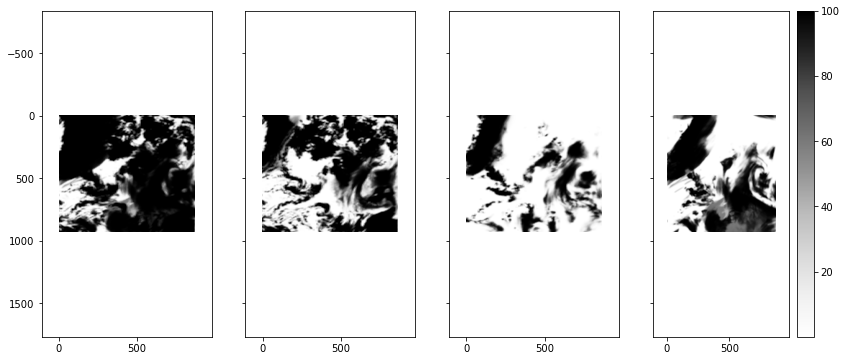

In [54]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True)

colormap = plt.cm.Greys
plt1 = ax1.imshow(cloud_cover, cmap=colormap, label='Total')
ax2.imshow(low_clouds, cmap=colormap)
ax3.imshow(medium_clouds, cmap=colormap)
ax4.imshow(high_clouds, cmap=colormap)

plt.colorbar(mappable=plt1)
plt.show()

In [55]:
a = np.cumsum(cloud_cover)[-1] / cloud_cover.size
print(a, a.shape, cloud_cover.size)

80.9197213926 () 807301
